   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


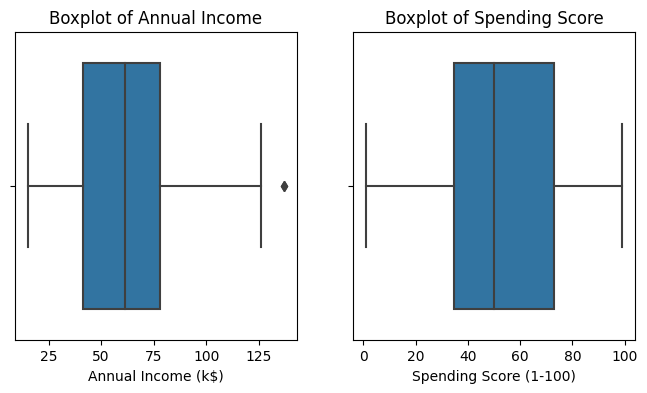

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
195       0   17                  61                      66
196       0   27                  62                      23
197       1   14                  62                      61
198       1   14                  63                      16
199       1   12                  63                      69


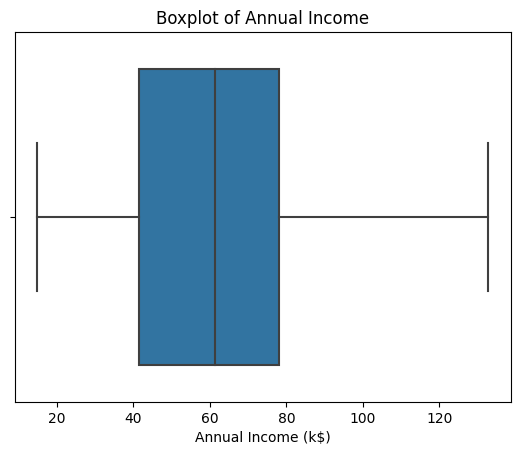

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

updated_df = pd.read_csv("Mall_Customers.csv")
print(updated_df.head())
print(updated_df.isnull().sum())
#updated_df = data.dropna(axis=0)
updated_df=updated_df.drop('CustomerID', axis=1)
# this following source code from https://www.kaggle.com/code/mathesht/mall-customer-segmentation-notebook
plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,2,1)
plt.title("Boxplot of Annual Income")
sns.boxplot(x = updated_df['Annual Income (k$)'])

plt.subplot(1,2,2)
plt.title("Boxplot of Spending Score")
sns.boxplot(x= updated_df['Spending Score (1-100)'])

plt.show()
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur = remove_outlier(updated_df['Annual Income (k$)'])
updated_df['Annual Income (k$)']=np.where(updated_df['Annual Income (k$)'] > ur, ur , updated_df['Annual Income (k$)'])
updated_df['Annual Income (k$)']=np.where(updated_df['Annual Income (k$)'] < lr, lr ,updated_df['Annual Income (k$)'])
plt.title("Boxplot of Annual Income")
sns.boxplot(x = updated_df['Annual Income (k$)'])
# to this point
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in updated_df:
    updated_df[i]=labelencoder.fit_transform(updated_df[i])


print(updated_df.tail())



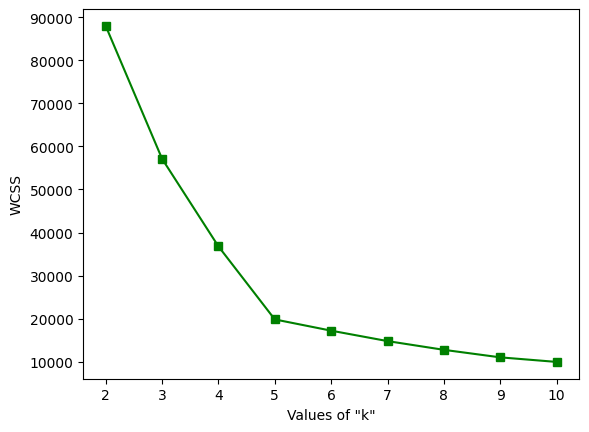

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  k_means_labels  \
195       0   17                  61                      66               3   
196       0   27                  62                      23               2   
197       1   14                  62                      61               3   
198       1   14                  63                      16               2   
199       1   12                  63                      69               3   

     ms_labels  DBSCAN  
195          2       0  
196          1       0  
197          2       0  
198          1       0  
199          2       0  
Silhouette_score For K Means 0.45422056472148975
Silhouette_score For Mean Shift 0.32729618099072694
Silhouette_score For Mean Shift 0.25309103566031926


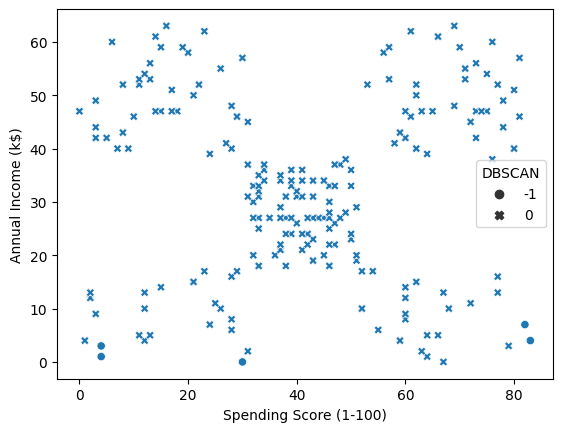

In [35]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.metrics import silhouette_score
# for identify the number of clusters i used the foolowong code from https://www.geeksforgeeks.org/determining-the-number-of-clusters-in-data-mining/
# https://www.kaggle.com/code/mathesht/mall-customer-segmentation-notebook
#  extracting values from two
# columns for clustering
dataset_new = updated_df[['Annual Income (k$)',
					'Spending Score (1-100)']].values
# determining the maximum number of clusters
# using the simple method
limit = int((dataset_new.shape[0]//2)**0.5)

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
	model = KMeans(n_clusters=k)
	model.fit(dataset_new)
	wcss[k] = model.inertia_
	
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()
# until this point
# Training the K-Means
k_means = KMeans(n_clusters = 5)
k_means.fit(updated_df )
k_means_labels = k_means.labels_
ms = MeanShift(bandwidth=25)
ms.fit(updated_df)
ms_labels = ms.labels_
np.unique(ms.labels_)
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=12.5, min_samples=4).fit(updated_df)
DBSCAN_labels = clustering.labels_
# Adding both the Mean Shift and kmeans labels to our dataset for analysis
updated_df['k_means_labels'] = k_means_labels
updated_df['ms_labels'] = ms_labels
updated_df['DBSCAN'] = DBSCAN_labels
print(updated_df.tail())
#sns.scatterplot(data=updated_df , x="Spending Score (1-100)", y="Annual Income (k$)", style="k_means_labels")
# # Training the Mean Shift


# # print(updated_df.tail())
#sns.scatterplot(data=updated_df , x="Spending Score (1-100)", y="Annual Income (k$)", style="ms_labels")

sns.scatterplot(data=updated_df , x="Spending Score (1-100)", y="Annual Income (k$)", style="DBSCAN")
# Calculating the Silhouette_score for K - Means
print("Silhouette_score For K Means {}".format(silhouette_score(updated_df, k_means_labels)))
print("Silhouette_score For Mean Shift {}".format(silhouette_score(updated_df, ms_labels)))
print("Silhouette_score For Mean Shift {}".format(silhouette_score(updated_df, DBSCAN_labels)))